# 逻辑回归代码实现

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score

##### 加载数据的函数

In [9]:
def loaddata():
    data = np.loadtxt('data/data1.txt',delimiter=',')
    n = data.shape[1] - 1  # 特征数
    X = data[:, 0:n]
    y = data[:, -1].reshape(-1, 1)
    return X, y

##### 画散点图

In [10]:
def plot(X,y):
    pos = np.where(y==1)
    neg = np.where(y==0)
    plt.scatter(X[pos[0],0],X[pos[0],1],marker='x')
    plt.scatter(X[neg[0], 0], X[neg[0], 1], marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

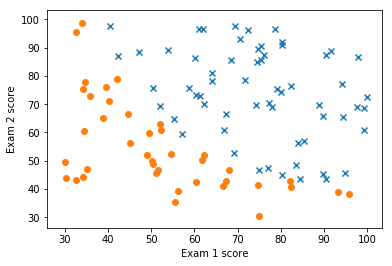

In [11]:
X, y = loaddata()
plot(X,y)

##### 实现sigmoid函数
<img src="images/01.png" width="200" align="left"/>

In [12]:
def sigmoid(z):
    r = 1/(1+np.exp(-z))
    return r;

In [13]:
sigmoid(np.array([3,4,-8]))

array([9.52574127e-01, 9.82013790e-01, 3.35350130e-04])

##### 实现假设函数
<img src="images/02.png" width="200" align="left"/>

In [14]:
def hypothesis(X,theta):
    z = np.dot(X,theta)
    return sigmoid(z)

##### 损失函数
<img src="images/03.png" width="250" align="left"/>

In [15]:
def computeCost(X,y,theta):
    m = X.shape[0]
    l = -1*y*np.log(hypothesis(X,theta))-(1-y)*np.log(1-hypothesis(X,theta))
    return np.sum(l)/m

##### 梯度下降法求解
<img src="images/04.png" width="250" align="left"/>

In [24]:
def gradientDescent(X,y,theta,iterations,alpha):
    #取数据条数
    m = X.shape[0]
    #在x最前面插入全1的列
    X = np.hstack((np.ones((m,1)),X))
    for i in range(iterations):
        for j in range(len(theta)):
            #迭代公式
            theta[j]=theta[j]-(alpha/m)*np.sum((hypothesis(X,theta)-y)*X[:,j].reshape(-1,1))
        if(i%10000==0):
            #每迭代1000次输出一次损失值
             print('第',i,'次迭代，当前损失为：',computeCost(X,y,theta),'theta=',theta)
    return theta

##### 预测函数

In [34]:
def predict(X):
    # 在x最前面插入全1的列
    m = X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    #求解假设函数的值
    h = hypothesis(X,theta)
    #根据概率值决定最终的分类,>=0.5为1类，<0.5为0类
    h[h>=0.5]=1
    h[h<0.5]=0
    return h

In [26]:
X,y = loaddata()

In [27]:
n = X.shape[1]#特征数
theta = np.zeros(n+1).reshape(n+1, 1)  # theta是列向量,+1是因为求梯度时X前会增加一个全1列
iterations = 250000
alpha = 0.008

In [29]:
theta = gradientDescent(X,y,theta,iterations,alpha)
print('theta=\n',theta)

第 0 次迭代，当前损失为： 0.20845169580464154 theta= [[-25.72129741]
 [  0.22187349]
 [  0.19342001]]
第 10000 次迭代，当前损失为： 0.20820664114661475 theta= [[-25.7231796 ]
 [  0.22249597]
 [  0.1973034 ]]
第 20000 次迭代，当前损失为： 0.20778968640983397 theta= [[-25.7245726 ]
 [  0.21242356]
 [  0.21042681]]
第 30000 次迭代，当前损失为： 0.20794640005243512 theta= [[-25.72564325]
 [  0.19951675]
 [  0.21790574]]
第 40000 次迭代，当前损失为： 0.20744861597151062 theta= [[-25.72611843]
 [  0.20928482]
 [  0.20177576]]
第 50000 次迭代，当前损失为： 0.20781131057351337 theta= [[-25.72624391]
 [  0.22232407]
 [  0.19657958]]
第 60000 次迭代，当前损失为： 0.20749439183287252 theta= [[-25.72669751]
 [  0.20588742]
 [  0.21566579]]
第 70000 次迭代，当前损失为： 0.20732765590508195 theta= [[-25.72697514]
 [  0.20308217]
 [  0.20912104]]
第 80000 次迭代，当前损失为： 0.2077466917027759 theta= [[-25.72678934]
 [  0.22171338]
 [  0.19460839]]
第 90000 次迭代，当前损失为： 0.20743364790364135 theta= [[-25.72698574]
 [  0.20925196]
 [  0.21308287]]
第 100000 次迭代，当前损失为： 0.20740541183844102 theta= [[-25.72

##### 画决策边界

In [30]:
def plotDescisionBoundary(X,y,theta):
    cm_dark = mpl.colors.ListedColormap(['g', 'r'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.scatter(X[:,0],X[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

    #化分类决策面 theta0+theta1*x1+theta2*x2 = 0
    # x1 = np.arange(20,110,0.1)
    x1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1)
    x2 = -(theta[1]*x1+theta[0])/theta[2]
    plt.plot(x1,x2)
    plt.show()

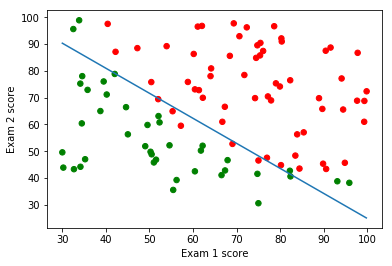

In [31]:
plotDescisionBoundary(X,y,theta)

In [36]:
p = predict(X)
print('准确率=',accuracy_score(y,p))


准确率= 0.9
